In [141]:
# pip install librosa

In [142]:
import kagglehub
import os
# Download latest version
path_of_dir = kagglehub.dataset_download("dmitrybabko/speech-emotion-recognition-en")

print("Path to dataset files:", path_of_dir)

Path to dataset files: C:\Users\Dipam1\.cache\kagglehub\datasets\dmitrybabko\speech-emotion-recognition-en\versions\1


In [143]:
Ravdess_path = path_of_dir + "/Ravdess/audio_speech_actors_01-24/"
Tess_path = path_of_dir + "/Tess/"

Ravdess_dir_list = os.listdir(Ravdess_path)
Tess_dir_list = os.listdir(Tess_path)

In [144]:
# Audio(filename=Tess_path + it + '/' + file, autoplay= True)

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Audio
import librosa

In [146]:
map_dir = {
    "SAD": "sad",
    "ANG": "angry",
    "DIS": "disgust",
    "FEA": "fear",
    "HAP": "happy",
    "NEU": "neutral"
}

In [147]:
label = []
path = []

for dirpath, dirnames, filenames  in os.walk('SEM/Crema/'):
    for i in range(len(filenames)):
        file_path = os.path.join(dirpath,filenames[i])
        path.append(file_path)
        lab = file_path.split("_")[2]
        label.append(map_dir.get(lab))

In [148]:
# Audio(filename=f, autoplay= True)

In [149]:
print(len(path), " & ", len(label))

4120  &  4120


In [150]:
map_dir_savee = {
    'a': 'angry',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad',
    'su': 'surprise'
}

In [151]:
for dirpath, dirnames, filenames  in os.walk('SEM/Savee/'):
    for i in range(len(filenames)):
        file_path = os.path.join(dirpath,filenames[i])
        path.append(file_path)
        # lab = file_path.split("_")[1]
        # label.append(map_dir_savee.get(lab.split(".")[0][:1]))

        part = file_path.split('_')[1]
        part = part[:-6]
        if part == 'a':
            label.append('angry')
        elif part == 'd':
            label.append('disgust')
        elif part == 'f':
            label.append('fear')
        elif part == 'h':
            label.append('happy')
        elif part == 'n':
            label.append('neutral')
        elif part == 'sa':
            label.append('sad')
        elif part == 'su':
            label.append('surprise')
        else:
            label.append('Unknown')

In [152]:
# Audio(filename=file_path, autoplay= True)

In [153]:
print(len(path), " & ", len(label))

4600  &  4600


In [154]:
for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part_emotion = file.split('.')[0]
        part_emotion = part_emotion.split('_')[2]
        
        if part_emotion=='ps':
            label.append('surprise')
        else:
            label.append(part_emotion)
        path.append(Tess_path + it + '/' + file)

In [155]:
print(len(path), " & ", len(label))

7400  &  7400


In [156]:
ravness_emotion = {
    "1": "neutral", 
    "2": "calm", 
    "3": "happy", 
    "4": "sad", 
    "5": "angry", 
    "6": "fearful", 
    "7": "disgust", 
    "8": "surprised"
}

In [157]:
for it in Ravdess_dir_list:
    # There are 20 actors  
    actor = os.listdir(Ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        label.append(ravness_emotion.get(int(part[2])))
        path.append(Ravdess_path + it + '/' + file)

In [158]:
print(len(path), " & ", len(label))

8840  &  8840


In [159]:
path[:5]

['SEM/Crema/1001_DFA_ANG_XX.wav',
 'SEM/Crema/1001_IEO_ANG_HI.wav',
 'SEM/Crema/1001_IEO_HAP_LO.wav',
 'SEM/Crema/1001_IOM_DIS_XX.wav',
 'SEM/Crema/1001_ITS_DIS_XX.wav']

In [160]:
label[:5]

['angry', 'angry', 'happy', 'disgust', 'disgust']

In [161]:
path[0]

'SEM/Crema/1001_DFA_ANG_XX.wav'

In [162]:
def convert_into_vector(sound):
    y, sr = librosa.load(sound, sr=16000)
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    
    # plt.figure(figsize=(10, 4))
    # librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel")
    # plt.colorbar()
    # plt.show()
    return mel_spec_db

In [163]:
# convert_into_vector("SEM/Crema/1001_IEO_HAP_LO.wav")

In [164]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
# mms.fit_transform(mfccs)
# mfccs

In [165]:
df = pd.DataFrame()

In [166]:
df["speech"] = path
df["label"] = label

In [168]:
df.head()

,speech,label
0,SEM/Crema/1001_DFA_ANG_XX.wav,angry
1,SEM/Crema/1001_IEO_ANG_HI.wav,angry
2,SEM/Crema/1001_IEO_HAP_LO.wav,happy
3,SEM/Crema/1001_IOM_DIS_XX.wav,disgust
4,SEM/Crema/1001_ITS_DIS_XX.wav,disgust


In [ ]:
df.shape

In [ ]:
df["label"].value_counts()

<Axes: xlabel='label'>

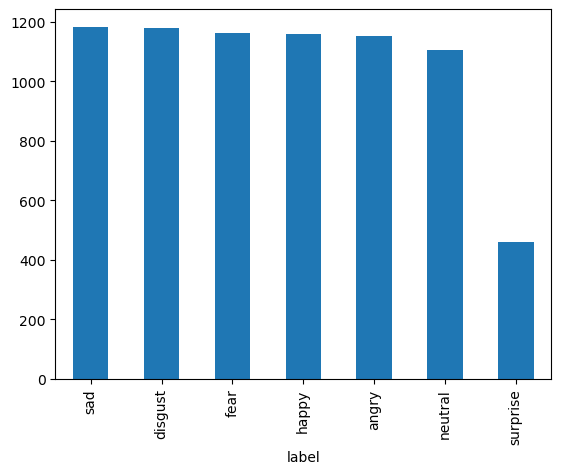

In [169]:
df['label'].value_counts().plot(kind='bar')

In [170]:
def add_noise(data,random=False,rate=0.035,threshold=0.075):
    if random:
        rate=np.random.random()*threshold
    noise=rate*np.random.uniform()*np.amax(data)
    augmented_data=data+noise*np.random.normal(size=data.shape[0])
    return augmented_data

def shifting(data,rate=1000):
    augmented_data=int(np.random.uniform(low=-5,high=5)*rate)
    augmented_data=np.roll(data,augmented_data)
    return augmented_data

def pitching(data,sr,pitch_factor=0.7,random=False):
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(y= data,sr= sr,n_steps= pitch_factor)

def streching(data,rate=0.8):
    return librosa.effects.time_stretch(y =data,rate= rate)

In [171]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data,sr)
    audio=np.array(aud)
    
    noised_audio=add_noise(data,random=True)
    aud2=extract_features(noised_audio,sr)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitching(data,sr,random=True)
    aud3=extract_features(pitched_audio,sr)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitching(data,sr,random=True)
    pitched_noised_audio=add_noise(pitched_audio1,random=True)
    aud4=extract_features(pitched_noised_audio,sr)
    audio=np.vstack((audio,aud4))
    
    return audio

In [172]:
df["label_encoder"] = df["speech"].apply(get_features)

In [173]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [174]:
print(X_train.shape, "--", X_test.shape)

(5920, 128, 128, 1) -- (1480, 128, 128, 1)


In [ ]:
X_train_reshaped = sc.fit_transform(X_train)
X_test_reshaped = sc.transform(X_test)

In [ ]:
df["label_encoder"] = df["speech"].apply(convert_into_vector)

In [ ]:
df.tail(10)
df["speech"].to_csv("Saved_Audio.csv")

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# df["label"] = le.fit_transform(df["label"])

In [ ]:
df["label_encoder"][0]

In [ ]:
df.head(5)

In [ ]:
df.dropna(subset=["label"], inplace=True)

In [ ]:
df["label"].isnull().sum()

In [ ]:
shapes = df["label_encoder"].apply(lambda x: x.shape)
print(shapes.unique())

In [ ]:
!pip install opencv-python
import cv2

def resize_array(arr, target_shape=(128, 128)):
    # If arr is grayscale (2D), resize and then add channel dimension
    resized = cv2.resize(arr, target_shape)
    # If you need a channel dimension, expand dims:
    if len(resized.shape) == 2:
        resized = np.expand_dims(resized, axis=-1)
    return resized

df["label_encoder"] = df["label_encoder"].apply(lambda x: resize_array(x, target_shape=(128, 128)))


In [177]:
df["label_encoder"].shape

(8840,)

In [176]:
X = np.stack(df["label_encoder"].values)
print(X.shape)  # Expected shape: (7400, 128, 128, 1)

ValueError: all input arrays must have the same shape

In [ ]:
X = X.reshape(-1, 128, 128, 1)  # (samples, height, width, channels)

In [ ]:
X.shape

In [ ]:
X[0]

In [ ]:
# ## input split
# X = np.expand_dims(X, -1)
# X.shape

In [ ]:
# X = X.reshape((X.shape[0], 1, X.shape[1]))  # Reshaping to (num_samples, 1, 13)


In [ ]:
X.shape

In [ ]:
# print(enc.categories_)

In [ ]:
df["label"].isnull().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y.shape

In [ ]:
y = y.toarray()
y.shape
y[:5]

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [175]:
print(X_train.shape, "--", y_train.shape)

(5920, 128, 128, 1) -- (5920, 7)


In [ ]:
# y_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded arrays to class indices
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))


In [ ]:
(confusion_matrix(y_test_labels, y_pred_labels))

In [ ]:
cnn_predictions = model.predict(X_test)
clf2_predictions = clf2.predict(X_test)
combined_predictions = (cnn_predictions + clf2_predictions) / 2.0  # simple averaging
final_predictions = np.argmax(combined_predictions, axis=1)


In [ ]:
audio_file = 'SEM/Savee/JK_d11.wav'
mfcc = convert_into_vector(audio_file)  # Ensure it returns 2D (40, T)

input_data = resize_array(mfcc, target_shape=(128, 128))

# Reshape the feature vector to (batch_size, height, width, channels)
input_data = input_data.reshape(-1, 128, 128, 1)

# CNN Model Prediction
# predictions = model.predict(input_data)
# predicted_class = np.argmax(predictions, axis=1)[0]

class_labels = {0: "angry", 1: "disgust", 2: "fear", 3: "happy", 4: "neutral", 5: "sad", 6: "surprise"}
print("Predicted emotion:", class_labels.get(predicted_class, "Unknown"))


In [ ]:
import pickle

In [ ]:
# with open('SED-1(67).pkl','wb') as f:
#     pickle.dump(model,f)

In [ ]:
with open('SED-1(67).pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [ ]:
y_pred_clf = clf2.predict(X_test)
y_test_labels_ = np.argmax(y_test, axis=1)
y_pred_labels_ = np.argmax(y_pred_clf, axis=1)

print(classification_report(y_test_labels_, y_pred_labels_))

In [ ]:


audio_file = 'SEM/Crema/1075_ITS_HAP_XX.wav'
mfcc = convert_into_vector(audio_file)
print("MFCC shape:", mfcc.shape)  # Expected output: (60,)

# Reshape the feature vector to add batch and channel dimensions (batch_size, timesteps, features)
input_data = mfcc.reshape(1, 40, 1)

# Predict with your trained model (ensure your model is loaded/trained appropriately)
predictions = clf2.predict(input_data)
predicted_class = np.argmax(predictions, axis=1)[0]
#Map the predicted class index to a human-readable label
class_labels = {0: "angry", 1: "disgust", 2: "fear", 3: "happy", 4: "neutral", 5: "sad",6:"surprise"}
print("Predicted emotion:", class_labels.get(predicted_class, "Unknown"))